<a href="https://colab.research.google.com/github/kevinokelly23-collab/Data-Acquisition-Project/blob/main/%20notebooks/Netflix_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition Project
# Kevin O'Kelly - Netflix Movies and Box office analysis


Project overview


This project follows the Data Acquisition coursework brief, which requires:
1. Importing and exploring a Kaggle dataset.  
2. Web scraping a complementary dataset.  
3. Merging the datasets.  
4. Visualising insights with Seaborn.  
5. Documenting and reflecting on AI use.


Datasets

file path: notebooks/Netflix_Data_Project.ipynb

Primary - Kaggle: Netflix Movies and TV Shows  https://www.kaggle.com/datasets/shivamb/netflix-shows

Complimentary - Scraped: Box Office Mojo All Time Worldwide Box Office  
https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/2001

# Step 1 Importing, exploring and cleaning my Kaggle Dataset

In [242]:
#Step 1: Import Libraries and Load netflix dataset
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/netflix_titles.csv")


In [243]:
#Step 1.1: Exploring the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [245]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [246]:
df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [247]:
df['release_year'].describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Okay so now that I have gotten my kaggle dataset imported and I can see that eveyrthing is as should be I want to filter to movies only as I will not be using the TV shows.

In [248]:
# Step 1.3: Filtering to movies only as I will not be using the TV shows

movies_df = df[df['type'].str.strip().str.lower() == 'movie'].copy()



In [249]:
movies_df['type'].value_counts()


,count
type,
Movie,6131


The Kaggle dataset 'Netflix Movies and TV shows' contains 8807 titles available.

After filtering to "movie" the datset contains 6131 movies.

Most movies were released between 2013-2021.

In [250]:
#Step 1.4: Checking for missing values

movies_df.isna().sum().sort_values(ascending=False)


,0
cast,475
country,440
director,188
duration,3
rating,2
title,0
show_id,0
type,0
release_year,0
date_added,0


# Step 1.41 Observations
**Data quality and Missing Values**

The dataset is generally clean, while only minor missing values:

Director : 188 missing

cast : 475 missing

country : 440 missing

duration : 3 missing

rating : 2 missing

**High missing Columns**

Director : 188 missing

cast : 475 missing

country : 440 missing



*   These three fields do not determine merges, do not affect numerical analysis and are not used for modelling



*   Fill with unknown

**Low missing columns**

Duration : 3 missing

Rating : 2 missing


Duration is important because its a clear movie attribute however only 3 rows are missing and same with rating


*   drop the rows











In [251]:
# Step 1.5: Handling Missing Values

# Fill high-missing categorical metadata
movies_df['cast'] = movies_df['cast'].fillna('Unknown')
movies_df['country'] = movies_df['country'].fillna('Unknown')
movies_df['director'] = movies_df['director'].fillna('Unknown')

# Drop rare missing numerical/categorical rows
movies_df = movies_df.dropna(subset=['duration'])
movies_df = movies_df.dropna(subset=['rating'])

In [252]:
movies_df.isna().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [253]:
movies_df['rating'].isna().sum()
movies_df['duration'].isna().sum()


np.int64(0)




*   As we can see here we have successfully removed all missing values. 0 in each column.





In [254]:
movies_df.shape


(6126, 12)



*   I am going to convert the duration column to an integer so it can be used for numerical analysis, as the original “90 min” text format cannot be processed in calculations.




In [255]:
# Changing to integer

movies_df['duration'] = (
    movies_df['duration']
        .str.replace(' min', '', regex=False)
        .astype(int)
)


In [256]:
# Validation
movies_df['duration'].head()
movies_df['duration'].dtype


dtype('int64')

In [257]:
movies_df['duration'].mean()


np.float64(99.58488410055502)



*   I am going to convert date_added into a proper datetime format so that the column can be sorted, filtered by time, and used for any time-based analysis, since the original text format cannot be processed reliably.




In [ ]:
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])


In [ ]:
movies_df['date_added'].dtype


dtype('<M8[ns]')

In [ ]:
movies_df.to_csv("cleaned_netflix_movies.csv", index=False)


In [131]:
from google.colab import files
files.download("cleaned_netflix_movies.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 1 Synopsis

*   As we can see there is no longer any missing values and the 5 rows have been removed.

*   The original shape was 6131 and its down to 6126.



*   Duration has been changed to an integer.
*   date_ added has been changed to a proper datetime format.



*   The dataset is now cleaned and we can save it and begin on our web scraping.



# Step 2 Web Scraping a Complementary Dataset

The goal of this step is to obtain **box-office performance data** for movies, which is not included in the Kaggle Netflix dataset.  
This information will later be merged using the movie **Title** column to explore relationships between Netflix availability and box-office success.

I will scrape data from *The Numbers* website, which lists the all-time worldwide box-office rankings for movies.


#### Inspecting the Website HTML Structure

Before starting to scrape, I inspected the HTML structure of *The Numbers*
box-office pages.

Each page has a clear and consistent layout:
- The main data is inside a `<center>` tag.
- Within it, there is a `<table>` containing the movie data.
- The `<thead>` section holds the column headers (e.g. *Rank, Movie, Worldwide, Domestic, International, Year*).
- The `<tbody>` contains multiple `<tr>` rows, each representing one movie.
- Each `<td>` cell within a row stores the actual values.

I'm hoping the structure makes it straightforward to scrape the data using BeautifulSoup, as the movie table can be selected directly using:
```python
soup.find("center").find("table")


# Step 2 Web Scraping a Complementary Dataset

The goal of this step is to obtain **box-office performance data** for movies, which is not included in the Kaggle Netflix dataset.  
This information will later be merged using the movie **Title** column to explore relationships between Netflix availability and box-office success.

I will scrape data from *The Numbers* website, which lists the all-time worldwide box-office rankings for movies.


#### Inspecting the Website HTML Structure

Before starting to scrape, I inspected the HTML structure of *The Numbers*
box-office pages.

Each page has a clear and consistent layout:
- The main data is inside a `<center>` tag.
- Within it, there is a `<table>` containing the movie data.
- The `<thead>` section holds the column headers (e.g. *Rank, Movie, Worldwide, Domestic, International, Year*).
- The `<tbody>` contains multiple `<tr>` rows, each representing one movie.
- Each `<td>` cell within a row stores the actual values.

I'm hoping the structure makes it straightforward to scrape the data using BeautifulSoup, as the movie table can be selected directly using:
```python
soup.find("center").find("table")


In [ ]:
# Step 2.1: Testing one page


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = "https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/1"

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    )
}

response = requests.get(url, headers=headers)
print("Status code:", response.status_code)

soup = BeautifulSoup(response.text, "html.parser")
center_tag = soup.find("center")
print("Center tag found:", bool(center_tag))

if center_tag:
    table = center_tag.find("table")
    print("Table found:", bool(table))
else:
    print("No <center> tag found.")



Status code: 200
Center tag found: True
Table found: False


I started by sending a single HTTP request to the first page of The Numbers box-office rankings.

The status code 200 confirmed that the site allowed access, and the center tag was found as expected.

However, no table was detected inside the center section, which meant my initial assumption about the HTML structure was incomplete and the scraping logic needed to be more flexible.

I asked ChatGPT what I should try next. It suggested broadening the search to look for a table both inside the center tag and anywhere else on the page as a fallback leading to the next step.

In [ ]:
# Step 2.11: Locating the Table Correctly

soup = BeautifulSoup(response.text, "html.parser")

# Try multiple methods to locate the table
table = None

# Option 1: look for <center> first, then any table within
center_tag = soup.find("center")
if center_tag:
    table = center_tag.find("table")

# Option 2: fallback – look for any table on the page
if not table:
    table = soup.find("table")

print("Center tag found:", bool(center_tag))
print("Table found:", bool(table))

if table:
    print("Table located successfully.")
else:
    print("Still no table — may need to inspect HTML structure again.")


Center tag found: True
Table found: True
Table located successfully.


By inspecting the website’s structure, I found that the movie table is nested inside a section called page_filling_chart, which explained why it wasn’t detected at first. I updated the scraping logic to locate the table more flexibly within the page.

I learned how conditional searching improves resilience when scraping sites with inconsistent layouts.


In [ ]:
# Step 2.2: Extract Headers and Sample Rows

rows = table.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
print("Headers found:", headers)

sample_data = []
for row in rows[1:6]:
    cols = [td.text.strip() for td in row.find_all("td")]
    sample_data.append(cols)

pd.DataFrame(sample_data, columns=headers)

Headers found: ['Rank', 'Year', 'Movie', 'WorldwideBox Office', 'DomesticBox Office', 'InternationalBox Office']


,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,923,706,026","$785,221,649","$2,138,484,377"
1,2,2019,Avengers: Endgame,"$2,717,503,922","$858,373,000","$1,859,130,922"
2,3,2022,Avatar: The Way of Water,"$2,322,902,023","$688,809,501","$1,634,092,522"
3,4,1997,Titanic,"$2,223,048,786","$674,460,013","$1,548,588,773"
4,5,2015,Star Wars Ep. VII: The Force Awakens,"$2,056,046,835","$936,662,225","$1,119,384,610"


I then extracted the header row and a small sample of data rows to make sure the table contained the columns I needed.

The output showed the expected fields: Rank, Year, Title, Worldwide, Domestic and International.

This confirmed that the page structure was suitable for scraping and that the data was in a tabular format that can be converted directly into a pandas DataFrame.

Once the strcuture was confirmed, I extended the scraper to loop through all 10,000 records on the site.

## Step 2.3: Full Web Scraper

In [ ]:
# Step 2.3: Full Scraper

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
import time

records = []

for start in range(1, 10001, 100):  # 1, 101, 201, ..., 9901
    if start == 1:
        url = "https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time"
    else:
        url = f"https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/{start}"

    print("Scraping:", url)

    req = Request(url, headers={"User-Agent": "Mozilla/5.0"})
    html = urlopen(req)
    soup = BeautifulSoup(html, "html.parser")

    table = soup.find("table")
    if table is None:
        print("No table found on this page — stopping.")
        break

    rows = table.find_all("tr")[1:]
    for row in rows:
        cols = [c.get_text(strip=True) for c in row.find_all("td")]
        if len(cols) == 6:
            records.append(cols)

    time.sleep(1.5)

df = pd.DataFrame(records, columns=["Rank", "Year", "Title", "Worldwide", "Domestic", "International"])
print("Total rows scraped:", len(df))
print("Unique movies:", df["Title"].nunique())


Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/101
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/201
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/301
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/401
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/501
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/601
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/701
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/801
Scraping: https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulati

### Web Scraper overview

The final version loops through 100 pages, successfully scraping 10,000 movies in total.

The urllib.request.Request method with a User-Agent header prevented 403 errors by imitating a real browser.

The scraper correctly located the table on each page, filtered only valid rows (len(cols)==6)), and stored them in a list.

The addition of time.sleep(1.5) ensured polite scraping and reduced the risk of being blocked.

The resulting DataFrame contained six clean columns: Rank, Year, Title, Worldwide, Domestic, and International.

## Step 2.4: Exploration of the Webscraped Dataset

In [ ]:
df.head(200)

,Rank,Year,Title,Worldwide,Domestic,International
0,1,2009,Avatar,"$2,923,706,026","$785,221,649","$2,138,484,377"
1,2,2019,Avengers: Endgame,"$2,717,503,922","$858,373,000","$1,859,130,922"
2,3,2022,Avatar: The Way of Water,"$2,322,902,023","$688,809,501","$1,634,092,522"
3,4,1997,Titanic,"$2,223,048,786","$674,460,013","$1,548,588,773"
4,5,2015,Star Wars Ep. VII: The Force Awakens,"$2,056,046,835","$936,662,225","$1,119,384,610"
...,...,...,...,...,...,...
195,196,2006,Casino Royale,"$594,420,216","$167,365,000","$427,055,216"
196,197,2008,Quantum of Solace,"$591,692,078","$169,368,427","$422,323,651"
197,198,2025,Mission: Impossible—The Final Reckoni…,"$591,353,074","$197,413,515","$393,939,559"
198,199,1997,Men in Black,"$587,790,539","$250,690,539","$337,100,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           10000 non-null  object
 1   Year           10000 non-null  object
 2   Title          10000 non-null  object
 3   Worldwide      10000 non-null  object
 4   Domestic       10000 non-null  object
 5   International  10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [ ]:
df.describe(include='all')

,Rank,Year,Title,Worldwide,Domestic,International
count,10000,10000,10000,10000,10000,10000
unique,10000,97,9798,9710,7540,7601
top,"9,984",2017,The Three Musketeers,"$6,000,000",,
freq,1,442,3,28,2130,2108


In [228]:
df.shape




(10000, 6)

In [ ]:
df.isna().sum()


,0
Rank,0
Year,0
Title,0
Worldwide,0
Domestic,0
International,0




*   No missing values to handle




## Step 2.5: Cleaning the Dataset

In [ ]:
import numpy as np
numbers_df = df.copy()

# Step 2.41 Check structure of the dataset
print("Initial shape:", numbers_df.shape)
print(numbers_df.head())

Initial shape: (10000, 6)
  Rank  Year                                 Title       Worldwide  \
0    1  2009                                Avatar  $2,923,706,026   
1    2  2019                     Avengers: Endgame  $2,717,503,922   
2    3  2022              Avatar: The Way of Water  $2,322,902,023   
3    4  1997                               Titanic  $2,223,048,786   
4    5  2015  Star Wars Ep. VII: The Force Awakens  $2,056,046,835   

       Domestic   International  
0  $785,221,649  $2,138,484,377  
1  $858,373,000  $1,859,130,922  
2  $688,809,501  $1,634,092,522  
3  $674,460,013  $1,548,588,773  
4  $936,662,225  $1,119,384,610  


The preview of the first few rows clearly showed values such as "$2,923,706,026", confirming that I needed an additional cleaning step to convert these to numeric types.




In [ ]:
# Step 2.42: Standarise column names
numbers_df.columns = numbers_df.columns.str.strip().str.title()
print("\nColumn names:", numbers_df.columns)


Column names: Index(['Rank', 'Year', 'Title', 'Worldwide', 'Domestic', 'International'], dtype='object')


In [ ]:
# Step 2.43: Cleaning Financial Columns
money_columns = ["Worldwide", "Domestic", "International"]

for col in money_columns:
    # Convert values to string first (avoids .str error)
    numbers_df[col] = numbers_df[col].astype(str)

    # Remove "$" and "," characters
    numbers_df[col] = numbers_df[col].str.replace("$", "", regex=False)
    numbers_df[col] = numbers_df[col].str.replace(",", "", regex=False)

    # Replace any empty strings or "nan" text with proper NaN values
    numbers_df[col] = numbers_df[col].replace(["", "nan"], np.nan)

    # Convert the column to numeric (float)
    numbers_df[col] = pd.to_numeric(numbers_df[col], errors="coerce")
print("\n After cleaning:")
print(numbers_df.head())


 After cleaning:
  Rank  Year                                 Title   Worldwide     Domestic  \
0    1  2009                                Avatar  2923706026  785221649.0   
1    2  2019                     Avengers: Endgame  2717503922  858373000.0   
2    3  2022              Avatar: The Way of Water  2322902023  688809501.0   
3    4  1997                               Titanic  2223048786  674460013.0   
4    5  2015  Star Wars Ep. VII: The Force Awakens  2056046835  936662225.0   

   International  
0   2.138484e+09  
1   1.859131e+09  
2   1.634093e+09  
3   1.548589e+09  
4   1.119385e+09  


This shows that I have successfully  

*   Removed Currency symbols
*   Removed Comas


*   Replaced empty strings with NAN
*   Numeric Type



### Saving the cleaned numbers csv

In [240]:
numbers_df.to_csv("clean_boxoffice_numbers.csv")

In [241]:
from google.colab import files
files.download("clean_boxoffice_numbers.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 3: Merging the Cleaned Datasets



*  The aim of this step is to merge the newly cleaned box-office dataset with the original Kaggle Netflix Movies dataset.
*  This allows me to analyse how Netflix's movie catalogue aligns with theatrical box-office performance, something that is not possible using the Netflix dataset alone.



### Loading and preparing the datasets
I begin by importing the cleaned Netflix dataset and the cleaned box-office dataset.
The box-office file sometimes contained an unwanted index column (Unnamed: 0), so I removed it to ensure a clean structure.

In [177]:
import pandas as pd

netflix_df = pd.read_csv("cleaned_netflix_movies.csv")
box_df = pd.read_csv("clean_boxoffice_numbers.csv")

# remove index column if it exists
box_df = box_df.drop(columns=["Unnamed: 0"], errors="ignore")


### Standardising Title Formatting
To merge the datasets, I needed a column that exists in both datasets.
The only shared field is the film title, but differences in capitalisation and spacing would prevent matches.

I created a clean_title column in both datasets by converting titles to lower case and removing extra spaces.


In [178]:
# Cleaning the Titles before merge
netflix_df["clean_title"] = netflix_df["title"].str.lower().str.strip()
box_df["clean_title"] = box_df["Title"].str.lower().str.strip()



### Merging the Datasets

I merged the Netflix dataset with the box-office dataset using the new clean_title column
Using a left merge keeps all Netflix movies, even those without a box-office result.
Only movies that appear in both datasets will receive revenue values.

In [179]:
# Merging by Title
merged_df = netflix_df.merge(
    box_df[["clean_title", "Worldwide", "Domestic", "International"]],
    on="clean_title",
    how="left"
)



In [180]:
merged_df.to_csv("merged_netflix_boxoffice.csv", index=False)


# Exploration of the Merged Datsets

In [190]:
numbers_df.head()


,Rank,Year,Title,Worldwide,Domestic,International
0,1,2009,Avatar,2923706026,785221649.0,2.138484e+09
1,2,2019,Avengers: Endgame,2717503922,858373000.0,1.859131e+09
2,3,2022,Avatar: The Way of Water,2322902023,688809501.0,1.634093e+09
3,4,1997,Titanic,2223048786,674460013.0,1.548589e+09
4,5,2015,Star Wars Ep. VII: The Force Awakens,2056046835,936662225.0,1.119385e+09


In [215]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        6175 non-null   object 
 1   type           6175 non-null   object 
 2   title          6175 non-null   object 
 3   director       6175 non-null   object 
 4   cast           6175 non-null   object 
 5   country        6175 non-null   object 
 6   date_added     6175 non-null   object 
 7   release_year   6175 non-null   int64  
 8   rating         6175 non-null   object 
 9   duration       6175 non-null   int64  
 10  listed_in      6175 non-null   object 
 11  description    6175 non-null   object 
 12  clean_title    6175 non-null   object 
 13  Worldwide      1060 non-null   float64
 14  Domestic       981 non-null    float64
 15  International  958 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 772.0+ KB


In [219]:
df.describe(include='all')

,Rank,Year,Title,Worldwide,Domestic,International
count,10000,10000,10000,10000,10000,10000
unique,10000,97,9798,9710,7540,7601
top,"9,984",2017,The Three Musketeers,"$6,000,000",,
freq,1,442,3,28,2130,2108


In [216]:
merged_df[["Worldwide", "Domestic", "International"]].describe()


,Worldwide,Domestic,International
count,1.060000e+03,9.810000e+02,9.580000e+02
mean,1.006388e+08,5.087507e+07,5.925746e+07
std,1.501941e+08,6.220899e+07,9.928066e+07
min,5.685597e+06,1.792000e+03,7.100000e+01
25%,1.828941e+07,1.126875e+07,8.018554e+06
50%,4.705747e+07,3.145795e+07,2.545711e+07
75%,1.221892e+08,6.977297e+07,7.167992e+07
max,2.048158e+09,7.000596e+08,1.369343e+09




*   This gives a quick summary of the revenue distribution in the merged dataset, including minimum, maximum and average earnings.




In [187]:
total_movies = len(merged_df)
total_movies


6175

In [218]:
match_percentage = (matched_count / total_movies) * 100
match_percentage


np.float64(17.16599190283401)

In [189]:
from google.colab import files
files.download("merged_netflix_boxoffice.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 4 Visualisations

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


Below I am creating matched_df to isolate only the Netflix movies that successfully matched with box office records. This filtered dataset contains all the films where both Netflix information and box office revenue exist. Using this subset allows me to analyse meaningful relationships (correlations, trends and visualisations) that rely on having data

In [198]:
merged_df = pd.read_csv("merged_netflix_boxoffice.csv")

# Movies that have box office data (Worldwide not NaN)
matched_df = merged_df[merged_df["Worldwide"].notna()].copy()

print("Matched movies:", len(matched_df))


Matched movies: 1060


# Top 15 Highest Grosssing Movies on Netflix

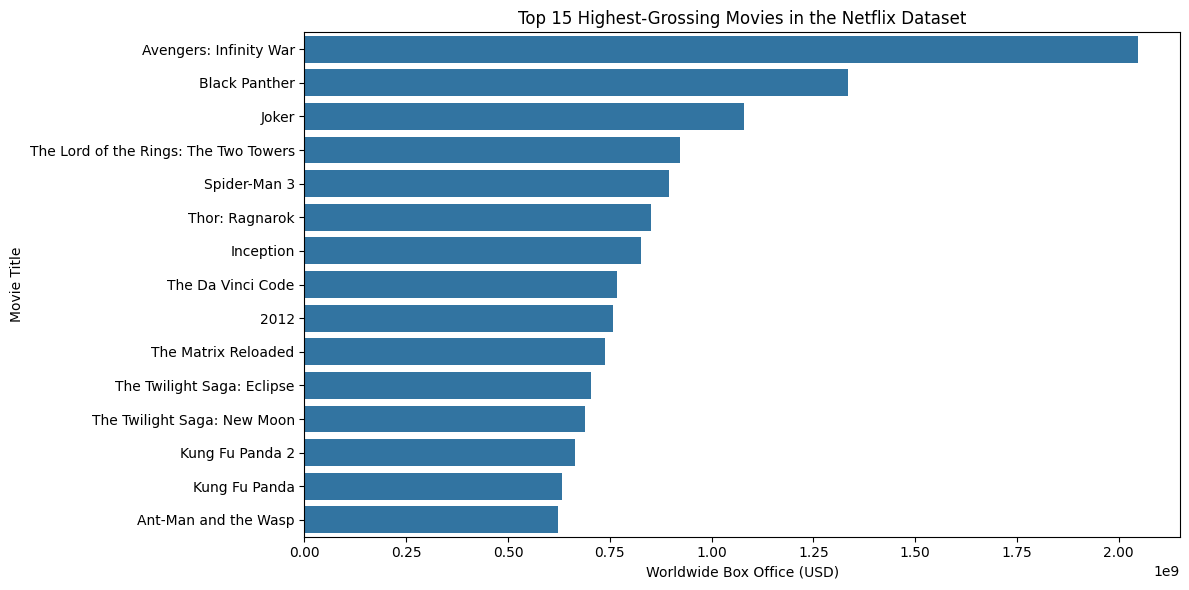

In [201]:
top15 = matched_df.sort_values("Worldwide", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top15, y="title", x="Worldwide")
plt.xlabel("Worldwide Box Office (USD)")
plt.ylabel("Movie Title")
plt.title("Top 15 Highest-Grossing Movies in the Netflix Dataset")
plt.tight_layout()
plt.show()



*   This bar chart shows the top 15 highest-grossing theatrical movies that are available on Netflix in my dataset.

*   The movies are sorted by worldwide box office revenue, which clearly highlights the presence of major blockbuster franchises such as Avengers, Black Panther, and Joker.
*   This visualisation demonstrates that while Netflix hosts thousands of films, only a small portion of them were major box office successes. It also shows the variation in revenue within this top segment.



# Which Genres on Netflix Have the Highest Box Office Success?

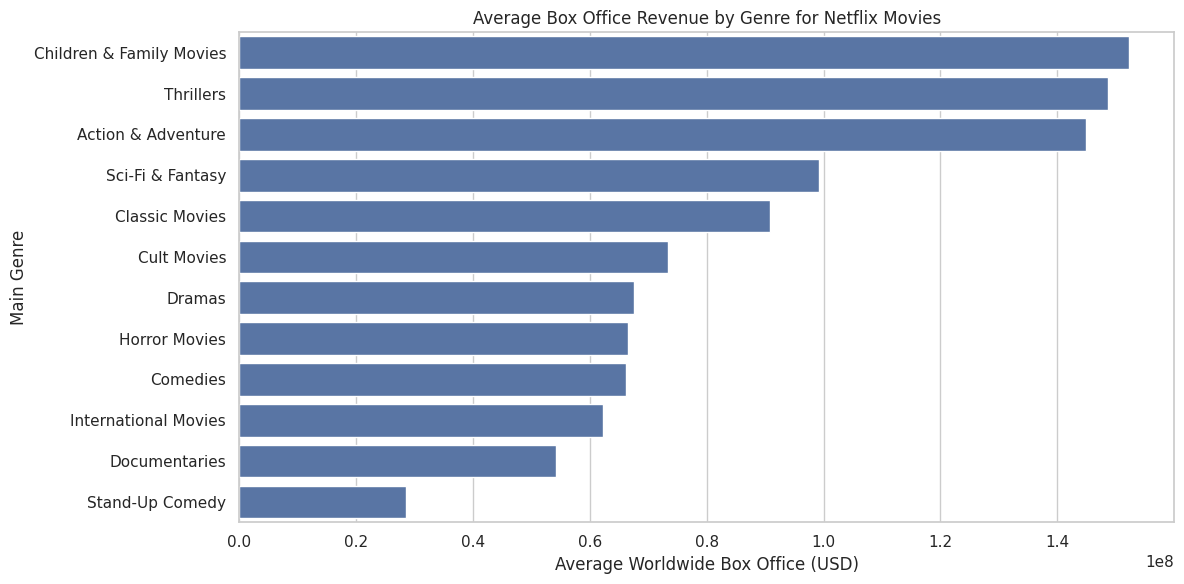

In [206]:
matched_df["main_genre"] = matched_df["listed_in"].str.split(",").str[0].str.strip()

genre_revenue = (
    matched_df.groupby("main_genre")["Worldwide"]
    .mean()
    .sort_values(ascending=False)
    .head(12)
)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)
plt.xlabel("Average Worldwide Box Office (USD)")
plt.ylabel("Main Genre")
plt.title("Average Box Office Revenue by Genre for Netflix Movies")
plt.tight_layout()
plt.show()


# Key takeaways

*   For each movie, I extracted the first listed genre and calculated the average worldwide box office revenue per genre.


*   This chart helps identify which genres tend to perform better theatrically among movies available on Netflix.
Genres such as Action & Adventure, Thrillers, and Children & Family Movies show the highest averages, which aligns with typical cinema trends where big-budget, broad-appeal films dominate.
*   This visualisation reveals how genre influences theatrical success and gives context for the types of movies Netflix licenses that previously performed well in cinemas.






# Distribution of Box Office Revenue for Netflix Movies

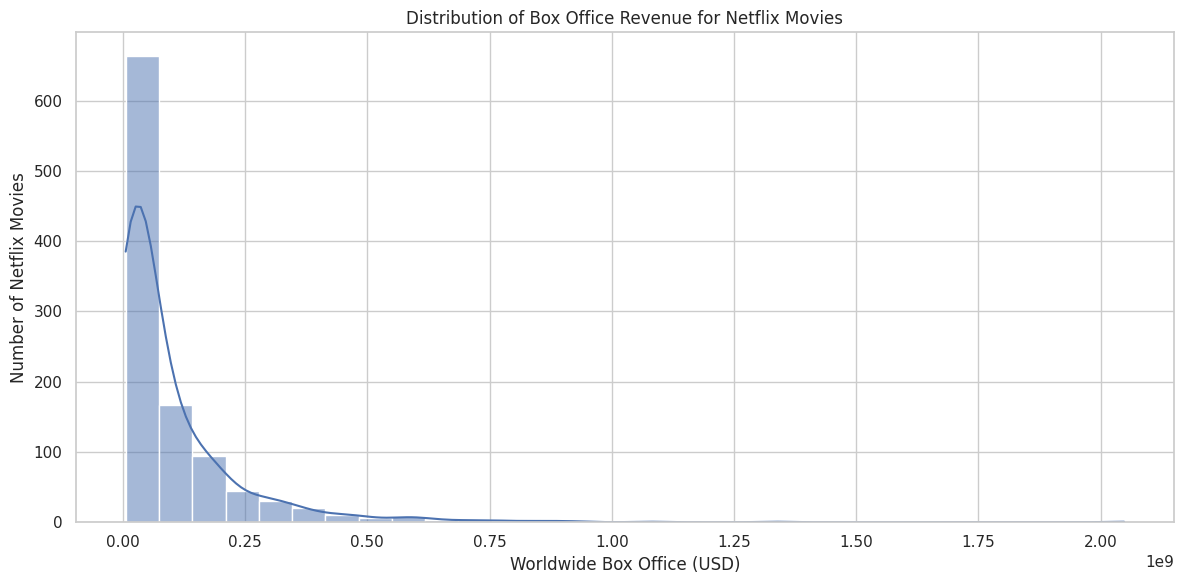

In [211]:
plt.figure(figsize=(12,6))
sns.histplot(matched_df["Worldwide"], bins=30, kde=True)

plt.xlabel("Worldwide Box Office (USD)")
plt.ylabel("Number of Netflix Movies")   # <-- clearer y-axis label
plt.title("Distribution of Box Office Revenue for Netflix Movies")

plt.tight_layout()
plt.show()


#   Key Takeaways

*   This histogram shows the distribution of box office revenues for all Netflix movies that had box office data available.



*   The y-axis represents the number of Netflix movies, and the x-axis represents their theatrical revenue.
The distribution is heavily left sided meaning:


1.   Most Netflix movies earned between 0 - 200 million dollars in cinemas.
2.   Only a small number earned more than 500 million dollars.
3.   Billion-dollar blockbusters are extremely rare.






# Correlation heatmap - What drives Box Office Success?

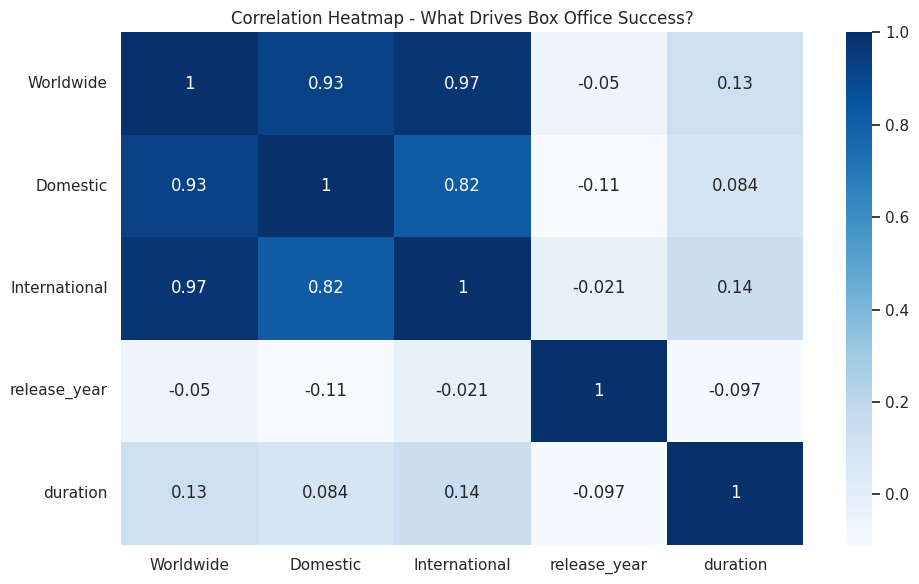

In [214]:
# Graph 4

# Prepare numeric subset
corr_df = matched_df[[
    "Worldwide",
    "Domestic",
    "International",
    "release_year",
    "duration"
]].copy()

plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap - What Drives Box Office Success?")
plt.tight_layout()
plt.show()


# Key Takeaways

1. Worldwide revenue is driven by domestic + international earnings

Both show very high correlations (0.93 and 0.97).
Worldwide box office is almost completely explained by these two values.

2. Release year does not affect box office performance

Correlations are close to zero.
Older and newer films in the Netflix dataset perform similarly.

3. Runtime is not linked to box office success

Correlations are very weak (around 0.1).
Movie length does not predict how much money a film makes.

4. Domestic and international revenue rise together

Strong correlation (0.82).
Movies that do well in one market typically do well in the other.